# <center> FINAL PROJECT: STUDENT PERFORMANCE FACTORS <center> 

## A. INFORMATION

### I. Member Information


<center>

|No. | Name          | Student ID   | Email                    |
|:--:|:-------------:|:------------:|:------------------------:|
| 1  | Võ Hùng Khoa  | 22127202     | vhkhoa22@clc.fitus.edu.vn|
| 2  | Vũ Tuấn Hùng  | 22127137     | vthung22@clc.fitus.edu.vn|
| 3  | Huỳnh Tấn Đạt | 22127059     | htdat222@clc.fitus.edu.vn|

<center>

### II. Project Information 
#### 1. Project Introduction 
- In this project, students are required to select a public dataset, such as those available on *Kaggle*, related to a topic of interest to their group. The project involves exploring the dataset, which often includes preprocessing steps, and identifying meaningful questions that can be answered using the data. Students are then tasked with preprocessing and analyzing the data to address each question effectively, demonstrating their ability to draw insights and conclusions from the analysis.

#### 2. Topic
- The chosen topic: **Student Performance Factors** 

- Using a dataset that covers study habits, attendance, parental involvement, and other factors, the project aims to analyze how these aspects impact students' exam performance.


## B. Project Details

### I. Import Library and Read Dataset

#### 1. Import Library

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
# Import more library if you need it
%matplotlib inline

#### 2. Read Dataset

In [46]:
data =  pd.read_csv("./StudentPerformanceFactors.csv")
data.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

### II. Data Preprocessing

#### 1. Hanlde Null and Duplicate Values

Looking at the big picture to identify what to do with the dataset!?

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

There are some null values in the dataset, so we are going to drop them all!

In [48]:
# Drop null-value
data.dropna(axis = 0 , inplace=True)
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

Then, we are going to drop the duplicate values!

In [49]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

#### 2. Convert categorical data type to numeric data type

Looks clean! However, after completing the data preprocessing, we need to handle the object values and convert them to numeric values. Before that, we need to learn more about the dataset we are going to handle.

<!-- <center> -->

| Attribute                | Description                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| Hours_Studied            | Number of hours spent studying per week.                                    |
| Attendance               | Percentage of classes attended.                                             |
| Parental_Involvement     | Level of parental involvement in the student's education (Low, Medium, High).|
| Access_to_Resources      | Availability of educational resources (Low, Medium, High).                 |
| Extracurricular_Activities| Participation in extracurricular activities (Yes, No).                      |
| Sleep_Hours              | Average number of hours of sleep per night.                                 |
| Previous_Scores          | Scores from previous exams.                                                 |
| Motivation_Level         | Student's level of motivation (Low, Medium, High).                          |
| Internet_Access          | Availability of internet access (Yes, No).                                  |
| Tutoring_Sessions        | Number of tutoring sessions attended per month.                             |
| Family_Income            | Family income level (Low, Medium, High).                                   |
| Teacher_Quality          | Quality of the teachers (Low, Medium, High).                               |
| School_Type              | Type of school attended (Public, Private).                                  |
| Peer_Influence           | Influence of peers on academic performance (Positive, Neutral, Negative).   |
| Physical_Activity        | Average number of hours of physical activity per week.                      |
| Learning_Disabilities    | Presence of learning disabilities (Yes, No).                               |
| Parental_Education_Level | Highest education level of parents (High School, College, Postgraduate).   |
| Distance_from_Home       | Distance from home to school (Near, Moderate, Far).                         |
| Gender                   | Gender of the student (Male, Female).                                       |
| Exam_Score               | Final exam score.                                                           |

<!-- <center> -->

In [50]:
# Handle each categorical columns

ordinal_mapping = {"Low": 0, "Medium": 1, "High": 2}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(ordinal_mapping.keys()):  # Kiểm tra nếu cột có giá trị thứ tự
        data[column] = data[column].map(ordinal_mapping)

education_mapping = {"High School": 0, "College": 1, "Postgraduate": 2}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(education_mapping.keys()):  # Kiểm tra nếu cột có giá trị thứ tự
        data[column] = data[column].map(education_mapping)

distance_mapping = {"Near": 0, "Moderate": 1, "Far": 2}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(distance_mapping.keys()):  # Kiểm tra nếu cột có giá trị thứ tự
        data[column] = data[column].map(distance_mapping)

sentiment_mapping = {"Positive": 2, "Neutral": 1, "Negative": 0}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(sentiment_mapping.keys()):  # Kiểm tra nếu cột có giá trị thứ tự
        data[column] = data[column].map(sentiment_mapping)

# Handle remaining categorical columns
for column in data.select_dtypes(include=['object']).columns:
    unique_values = data[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    data[column] = data[column].map(mapping)

In [51]:
data.head()

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     0                    2   
1             19          64                     0                    1   
2             24          98                     1                    1   
3             29          89                     0                    1   
4             19          92                     1                    1   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0            7               73                 0   
1                           0            8               59                 0   
2                           1            7               91                 1   
3                           1            8               98                 1   
4                           1            6               65                 1   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_Quality  \
0                0                  0              0                1   
1                0                  2              1                1   
2                0                  2              1                1   
3                0                  1              1                1   
4                0                  3              1                2   

   School_Type  Peer_Influence  Physical_Activity  Learning_Disabilities  \
0            0               2                  3                      0   
1            0               0                  4                      0   
2            0               1                  4                      0   
3            0               0                  4                      0   
4            0               1                  4                      0   

   Parental_Education_Level  Distance_from_Home  Gender  Exam_Score  
0                         0                   0       0          67  
1                         1                   1       1          61  
2                         2                   0       0          74  
3                         0                   1       0          71  
4                         1                   0       1          70

In [52]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6378 non-null   int64
 1   Attendance                  6378 non-null   int64
 2   Parental_Involvement        6378 non-null   int64
 3   Access_to_Resources         6378 non-null   int64
 4   Extracurricular_Activities  6378 non-null   int64
 5   Sleep_Hours                 6378 non-null   int64
 6   Previous_Scores             6378 non-null   int64
 7   Motivation_Level            6378 non-null   int64
 8   Internet_Access             6378 non-null   int64
 9   Tutoring_Sessions           6378 non-null   int64
 10  Family_Income               6378 non-null   int64
 11  Teacher_Quality             6378 non-null   int64
 12  School_Type                 6378 non-null   int64
 13  Peer_Influence              6378 non-null   int64
 14  Physical_Acti

Apply some logical to the dataset

In [53]:
data = data[(data["Exam_Score"] <= 100) & (data["Exam_Score"] >= 0)]
data = data[(data["Previous_Scores"] <= 100) & (data["Previous_Scores"] >= 0)]

In [54]:
data.describe()

Hours_Studied   Attendance  Parental_Involvement  Access_to_Resources  \
count    6377.000000  6377.000000           6377.000000          6377.000000   
mean       19.976008    80.018034              1.085620             1.098165   
std         5.985283    11.549434              0.694942             0.698689   
min         1.000000    60.000000              0.000000             0.000000   
25%        16.000000    70.000000              1.000000             1.000000   
50%        20.000000    80.000000              1.000000             1.000000   
75%        24.000000    90.000000              2.000000             2.000000   
max        44.000000   100.000000              2.000000             2.000000   

       Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
count                 6377.000000  6377.000000      6377.000000   
mean                     0.596832     7.035126        75.063353   
std                      0.490572     1.468091        14.399766   
min                      0.000000     4.000000        50.000000   
25%                      0.000000     6.000000        63.000000   
50%                      1.000000     7.000000        75.000000   
75%                      1.000000     8.000000        88.000000   
max                      1.000000    10.000000       100.000000   

       Motivation_Level  Internet_Access  Tutoring_Sessions  Family_Income  \
count       6377.000000      6377.000000        6377.000000    6377.000000   
mean           0.908107         0.075898           1.494747       0.787831   
std            0.695720         0.264855           1.233300       0.743430   
min            0.000000         0.000000           0.000000       0.000000   
25%            0.000000         0.000000           1.000000       0.000000   
50%            1.000000         0.000000           1.000000       1.000000   
75%            1.000000         0.000000           2.000000       1.000000   
max            2.000000         1.000000           8.000000       2.000000   

       Teacher_Quality  School_Type  Peer_Influence  Physical_Activity  \
count      6377.000000  6377.000000     6377.000000        6377.000000   
mean          1.197115     0.304846        1.191626           2.972714   
std           0.601027     0.460378        0.756386           1.029006   
min           0.000000     0.000000        0.000000           0.000000   
25%           1.000000     0.000000        1.000000           2.000000   
50%           1.000000     0.000000        1.000000           3.000000   
75%           2.000000     1.000000        2.000000           4.000000   
max           2.000000     1.000000        2.000000           6.000000   

       Learning_Disabilities  Parental_Education_Level  Distance_from_Home  \
count            6377.000000               6377.000000         6377.000000   
mean                0.104751                  0.705504            0.503685   
std                 0.306257                  0.780581            0.670465   
min                 0.000000                  0.000000            0.000000   
25%                 0.000000                  0.000000            0.000000   
50%                 0.000000                  1.000000            0.000000   
75%                 0.000000                  1.000000            1.000000   
max                 1.000000                  2.000000            2.000000   

            Gender   Exam_Score  
count  6377.000000  6377.000000  
mean      0.421672    67.246825  
std       0.493865     3.891637  
min       0.000000    55.000000  
25%       0.000000    65.000000  
50%       0.000000    67.000000  
75%       1.000000    69.000000  
max       1.000000   100.000000

All columns are in well format so now we can move on the next step!!! 

### III. Exploratory Data Analysis - EDA

#### 1. Overall

In [55]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Comment: 

#### 2. Additional Visualizations

To gain deeper insights into the factors affecting student performance, we will create additional visualizations. These visualizations will help us understand the relationships between various factors and the final exam scores.

##### **Distribution of Exam Scores**

First, let's visualize the distribution of exam scores to understand the overall performance of students.


### VI. Ask Meaningful Question

### **Question 3: Can factors like Attendance or Hours_Studied help improve Exam_Score even for students with lower Previous_Scores?**

#### **Why This Question is Important?**

- **Support for Low Performers**: This question addresses whether students with lower **Previous_Scores** can still achieve high academic performance by focusing on actionable factors like **Attendance** and **Hours_Studied**. It highlights strategies for improvement for those struggling with past performance.

- **Actionable Insights**: Identifying the impact of these factors provides clear guidance to students and educators on where to direct efforts for better outcomes.

- **Equity Consideration**: Understanding how external factors compensate for prior performance helps in designing interventions for students with diverse academic backgrounds.

- **Targeted Recommendations**: Insights into how **Attendance** and **Hours_Studied** influence performance for students with low **Previous_Scores**, offering actionable advice for improvement.

- **Understanding of Compensation**: Evidence on whether external factors can bridge the gap between low prior performance and high current outcomes.

- **Enhanced Decision-Making**: Educators and policymakers can use this analysis to prioritize resources like tutoring or attendance initiatives for students who need them most.

#### **Steps to Answer This Question**

1. **Group Students by Previous_Score**:
   - Divide the dataset into three groups (e.g., low, medium, high **Previous_Scores**) using quantiles or predefined thresholds.
   - This allows us to isolate and analyze trends within each category.

2. **Analyze the Impact of Attendance and Hours_Studied**:
   - Visualize the relationships between these factors and **Exam_Score** within each group.
   - Use scatter plots to highlight trends and patterns.

3. **Quantify the Relationships**: Calculate correlation coefficients for **Attendance** and **Hours_Studied** with **Exam_Score** within each group to measure the strength of these relationships.

4. **Compare and Contrast**: Compare the impact of **Attendance** and **Hours_Studied** across groups to determine if they compensate for lower prior performance.

5. **Draw Conclusions**:
   - Summarize findings to answer whether **Attendance** or **Hours_Studied** can help students with lower **Previous_Scores** achieve high **Exam_Scores**.
   - Provide actionable recommendations based on the analysis.

#### **Answer the Question**

##### Grouping Students by Previous_Score

To analyze the impact of **Attendance** and **Hours_Studied** within different levels of **Previous_Scores**, we first divide the dataset into three groups: **Low**, **Medium**, and **High**. This categorization allows us to isolate trends and better understand how these factors interact with **Exam_Score** across different levels of past performance.

In [ ]:
# Define Previous_Score categories
data['Previous_Score_Category'] = pd.qcut(data['Previous_Scores'], q=3, labels=['Low', 'Medium', 'High'])

# Display group counts to verify the distribution
print("Number of students in each Previous_Score category:")
data['Previous_Score_Category'].value_counts()

Number of students in each Previous_Score category:


Previous_Score_Category
Low       2230
High      2118
Medium    2029
Name: count, dtype: int64

##### **Visualizing Attendance vs Exam_Score**

Next, we explore how **Attendance** influences **Exam_Score** within each **Previous_Score** category. A scatter plot is used to highlight trends and differences across the three groups: **Low**, **Medium**, and **High**. This visualization will help us see whether higher attendance compensates for lower prior performance.

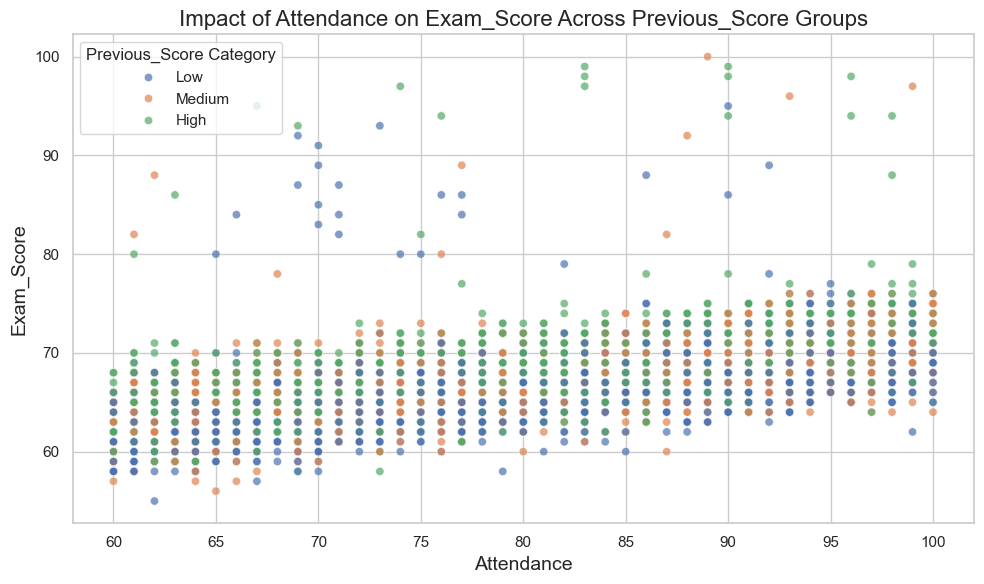

In [ ]:
# Scatter plot for Attendance vs Exam_Score by Previous_Score group
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Attendance', y='Exam_Score', hue='Previous_Score_Category', alpha=0.7)
plt.title('Impact of Attendance on Exam_Score Across Previous_Score Groups', fontsize=16)
plt.xlabel('Attendance', fontsize=14)
plt.ylabel('Exam_Score', fontsize=14)
plt.legend(title='Previous_Score Category')
plt.tight_layout()
plt.show()

**Insights**

- **General Trend**: The scatter plot indicates a positive relationship between **Attendance** and **Exam_Score** across all groups. Higher attendance is associated with better exam performance, regardless of prior scores.

- **Low Previous_Scores**:
  - Students with low prior scores tend to have lower overall exam scores, but higher attendance correlates strongly with improved performance.
  - This suggests that consistent attendance can help low-performing students bridge the gap.
  
- **Medium and High Previous_Scores**:
  - These groups also show strong positive trends, with higher attendance leading to better exam scores.
  - However, the effect of attendance appears slightly stronger for students with **Medium Previous_Scores**, as evidenced by the clustering of points near the higher range of **Exam_Score**.

##### **Visualize Hours_Studied vs Exam_Score by Previous_Score Group**

Now, we examine how **Hours_Studied** impacts **Exam_Score** within each **Previous_Score** group. Using another scatter plot, we compare trends to identify whether increased study hours can help students with lower **Previous_Scores** achieve better outcomes.

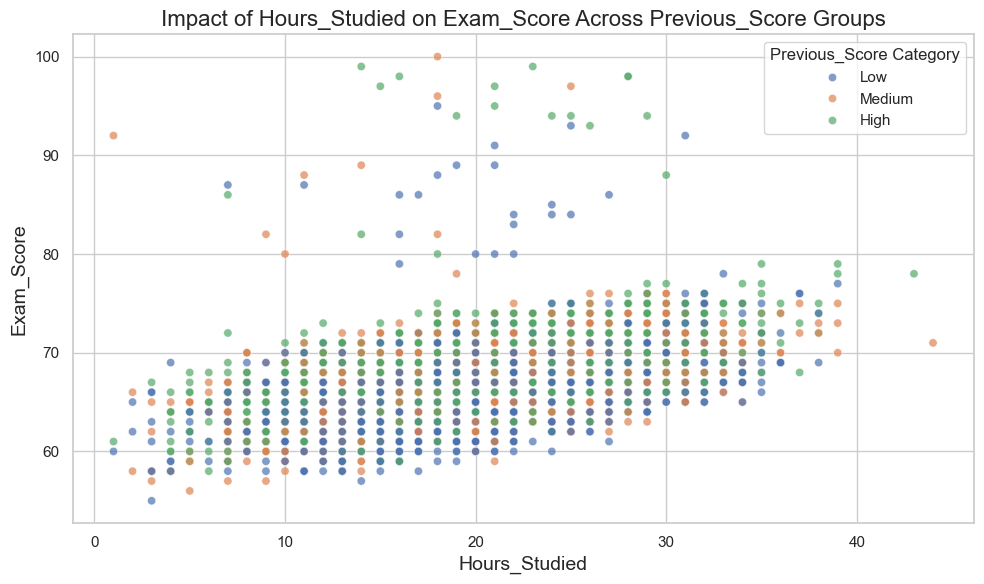

In [ ]:
# Scatter plot for Hours_Studied vs Exam_Score by Previous_Score group
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Hours_Studied', y='Exam_Score', hue='Previous_Score_Category', alpha=0.7)
plt.title('Impact of Hours_Studied on Exam_Score Across Previous_Score Groups', fontsize=16)
plt.xlabel('Hours_Studied', fontsize=14)
plt.ylabel('Exam_Score', fontsize=14)
plt.legend(title='Previous_Score Category')
plt.tight_layout()
plt.show()

**Insights**

- **General Trend**: A positive relationship exists between **Hours_Studied** and **Exam_Score** across all groups. As study hours increase, exam scores improve.

- **Low Previous_Scores**:
  - Students with low prior scores show a significant improvement in **Exam_Score** as **Hours_Studied** increases. This indicates that study time can partially compensate for lower prior performance.

- **Medium and High Previous_Scores**:
  - Similar trends are observed, but the effect of **Hours_Studied** is slightly less pronounced for students with higher **Previous_Scores**, who may already have a strong foundation.

##### **Quantifying Relationships with Correlation Analysis**


To quantify the influence of **Attendance** and **Hours_Studied** on **Exam_Score**, we calculate correlation coefficients within each **Previous_Score** group. This analysis provides a clear measurement of how strongly these factors affect performance for students with low, medium, or high prior scores.


In [ ]:
# Correlation analysis within each Previous_Score category
correlations = data.groupby('Previous_Score_Category')[['Attendance', 'Hours_Studied', 'Exam_Score']].corr()

correlations.round(3)

C:\Users\kyhoa\AppData\Local\Temp\ipykernel_27320\754924431.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correlations = data.groupby('Previous_Score_Category')[['Attendance', 'Hours_Studied', 'Exam_Score']].corr()


Attendance  Hours_Studied  Exam_Score
Previous_Score_Category                                                     
Low                     Attendance          1.000         -0.018       0.582
                        Hours_Studied      -0.018          1.000       0.443
                        Exam_Score          0.582          0.443       1.000
Medium                  Attendance          1.000         -0.027       0.620
                        Hours_Studied      -0.027          1.000       0.439
                        Exam_Score          0.620          0.439       1.000
High                    Attendance          1.000          0.030       0.583
                        Hours_Studied       0.030          1.000       0.464
                        Exam_Score          0.583          0.464       1.000

- **Low Previous_Score Group**:
  
  - **Attendance**: Correlation with **Exam_Score** is **0.582**, indicating a strong positive relationship.
  
  - **Hours_Studied**: Correlation with **Exam_Score** is **0.443**, also showing a positive impact, though slightly weaker than attendance.

- **Medium Previous_Score Group**:
  
  - **Attendance**: Correlation is **0.620**, slightly stronger than in the low group, suggesting that attendance is consistently important.
  
  - **Hours_Studied**: Correlation is **0.439**, similar to the low group.

- **High Previous_Score Group**:
  
  - **Attendance**: Correlation is **0.583**, showing a strong positive effect, consistent across all groups.
  
  - **Hours_Studied**: Correlation is **0.464**, slightly stronger than in other groups, indicating that even high-performing students benefit from additional study time.

#### **Conclusion**

1. **Attendance**:
   
   - Consistently has a strong positive effect on **Exam_Score** across all groups, especially for students with **Low Previous_Scores**.
   
   - For low performers, focusing on consistent attendance can significantly boost academic outcomes.

2. **Hours_Studied**:
   
   - Also has a positive effect, but the impact is slightly weaker than attendance.
   
   - Students with low prior scores can improve their **Exam_Score** by dedicating more time to studying.

3. **Key Takeaway**:
   
   - Students with **Low Previous_Scores** can partially compensate for their prior performance by increasing both **Attendance** and **Hours_Studied**.
   
   - Educators should emphasize consistent attendance and encourage effective study habits to support low-performing students.


##### **Recommendations**

- **For Students**: Prioritize consistent class attendance and dedicate sufficient study time, especially if past performance was low.

- **For Educators**: Implement strategies to improve attendance and provide resources or structured study plans to help students with low prior scores catch up.

- **For Institutions**: Consider attendance incentives and targeted tutoring programs to maximize the impact of these actionable factors.